Part1: ,

import opencv version 4.8.0, 
import requests  (download url),
Q1 Sobel kernel, Gaussian kernel, The 5 Haar-like masks :

In [6]:
"""kernel and mask with scale=1
   programe for 2d convolution
"""
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt


url = 'https://tanrobby.github.io/teaching/ece_visual/assignment1/img/einstein.png'
response = requests.get(url)
image_download = np.frombuffer(response.content, dtype=np.uint8)
image = cv2.imdecode(image_download, cv2.IMREAD_GRAYSCALE)
# plt.imshow(image,cmap = 'gray')   # show original image
image_x, image_y= image.shape
print(image.shape)


sobel_kernel_v = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_kernel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
guassian_kernel_3 = 1/16 * np.array([[1,2,1],
                                     [2,4,2],
                                     [1,2,1]])
guassian_kernel_5 = 1/256 * np.array([[1,4,6,4,1],
                                     [4,16,24,16,4],
                                     [6,24,36,24,6],
                                     [4,16,24,16,4],
                                     [1,4,6,4,1]])

def conv_2d(image, kernel):
    img_x, img_y= image.shape
    k_x, k_y=kernel.shape
    x,y= img_x-k_x+1, img_y-k_y+1
    res=[]
    for i in range(0,x):
        line=[]
        for j in range(0,y):
            val= image[i:i+k_x, j:j+k_y]
            line.append(np.sum(np.multiply(kernel, val)))
        res.append(line)
    return np.array(res)

def harrlike_masks(image, type, scale):
    if type==21:
        kernel=np.ones((2*scale,1*scale))
        kernel[:scale, :]=-1
        res= conv_2d(image, kernel)
        return res
    if type==12:
        kernel=np.ones((1*scale,2*scale))
        kernel[:, :scale]=-1
        res= conv_2d(image, kernel)
        return res
    if type==31:
        kernel=np.ones((3*scale,1*scale))
        kernel[scale:2*scale,:]=-1
        res= conv_2d(image, kernel)
        return res
    if type==13:
        kernel=np.ones((1*scale,3*scale))
        kernel[:,scale:2*scale]=-1
        res= conv_2d(image, kernel)
        return res
    if type==22:
        kernel=np.ones((2*scale,2*scale))
        kernel[:scale,:scale]=-1
        kernel[scale:2*scale, scale:2*scale]=-1
        res= conv_2d(image, kernel)
        return res

(314, 546)


Sobel kernel,
Gaussian kernel,

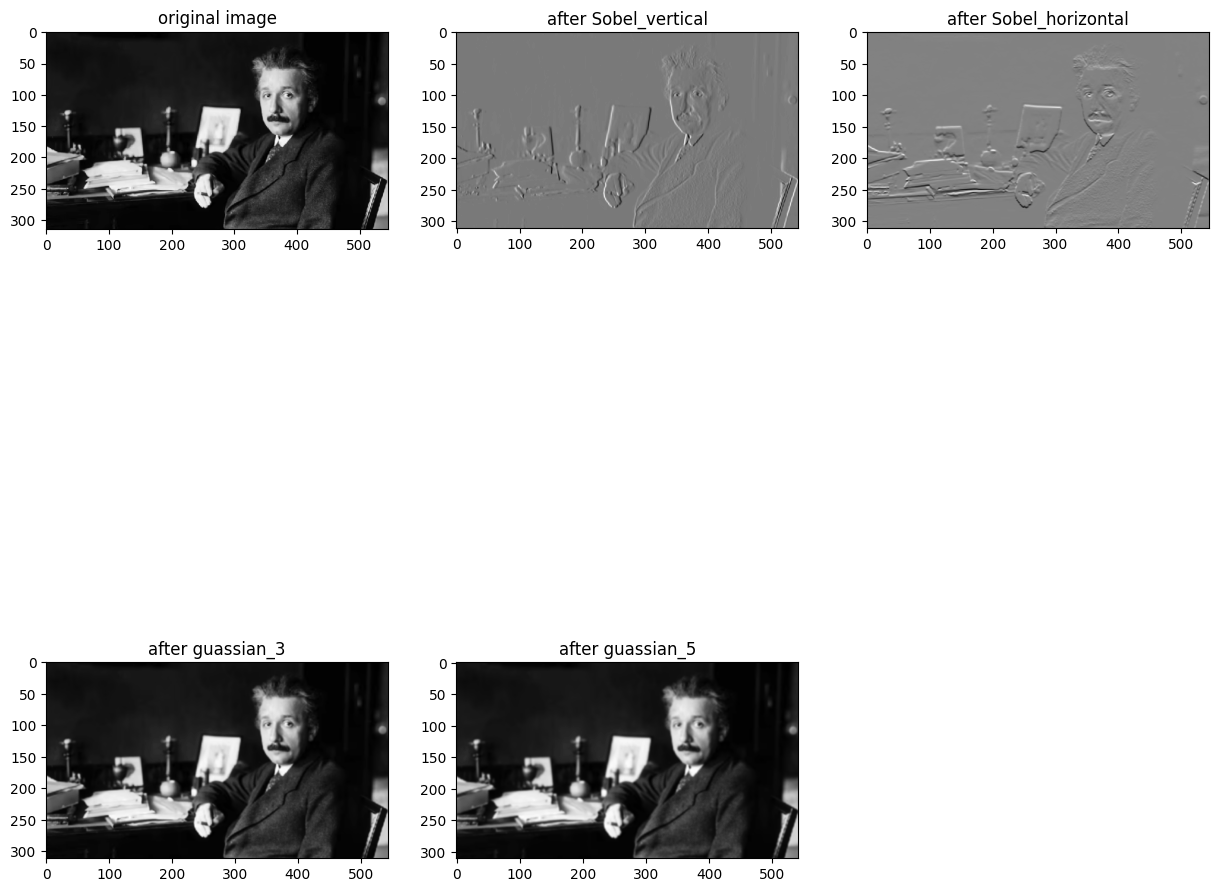

In [4]:
"""
show result of sobel and guassian_kernel_3, guassian_kernel_5
"""
image_after_s_v= conv_2d(image, sobel_kernel_v)
image_after_s_h= conv_2d(image, sobel_kernel_h)
image_after_g_3= conv_2d(image, guassian_kernel_3)
image_after_g_5= conv_2d(image, guassian_kernel_5)
plt.figure(figsize=(15,15))
plt.subplot(231)
plt.title('original image')
plt.imshow(image,cmap='gray')
plt.subplot(232)
plt.title('after Sobel_vertical')
plt.imshow(image_after_s_v,cmap='gray')
plt.subplot(233)
plt.title('after Sobel_horizontal')
plt.imshow(image_after_s_h,cmap='gray')
plt.subplot(234)
plt.title('after guassian_3')
plt.imshow(image_after_g_3,cmap='gray')
plt.subplot(235)
plt.title('after guassian_5')
plt.imshow(image_after_g_5,cmap='gray')

The 5 Haar-like masks (note, for this part, the user should be able to set the scale of the masks),
scaling factor 1 and 5

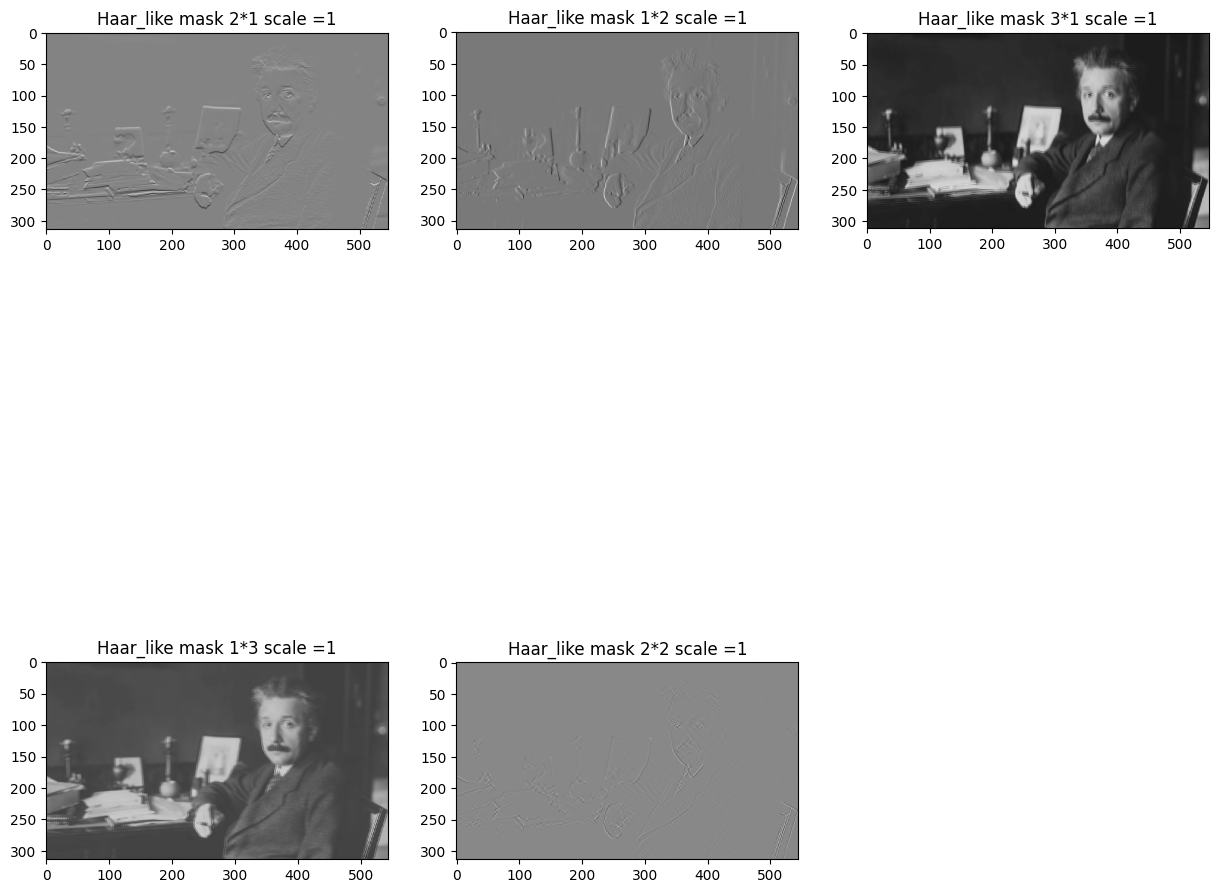

In [7]:
"""
scale factor=1
"""
res_1=harrlike_masks(image,21,1)
res_2=harrlike_masks(image,12,1)
res_3=harrlike_masks(image,31,1)
res_4=harrlike_masks(image,13,1)
res_5=harrlike_masks(image,22,1)
plt.figure(figsize=(15,15))
plt.subplot(231)
plt.title('Haar_like mask 2*1 scale =1')
plt.imshow(res_1,cmap='gray')
plt.subplot(232)
plt.title('Haar_like mask 1*2 scale =1')
plt.imshow(res_2,cmap='gray')
plt.subplot(233)
plt.title('Haar_like mask 3*1 scale =1')
plt.imshow(res_3,cmap='gray')
plt.subplot(234)
plt.title('Haar_like mask 1*3 scale =1')
plt.imshow(res_4,cmap='gray')
plt.subplot(235)
plt.title('Haar_like mask 2*2 scale =1')
plt.imshow(res_5,cmap='gray')

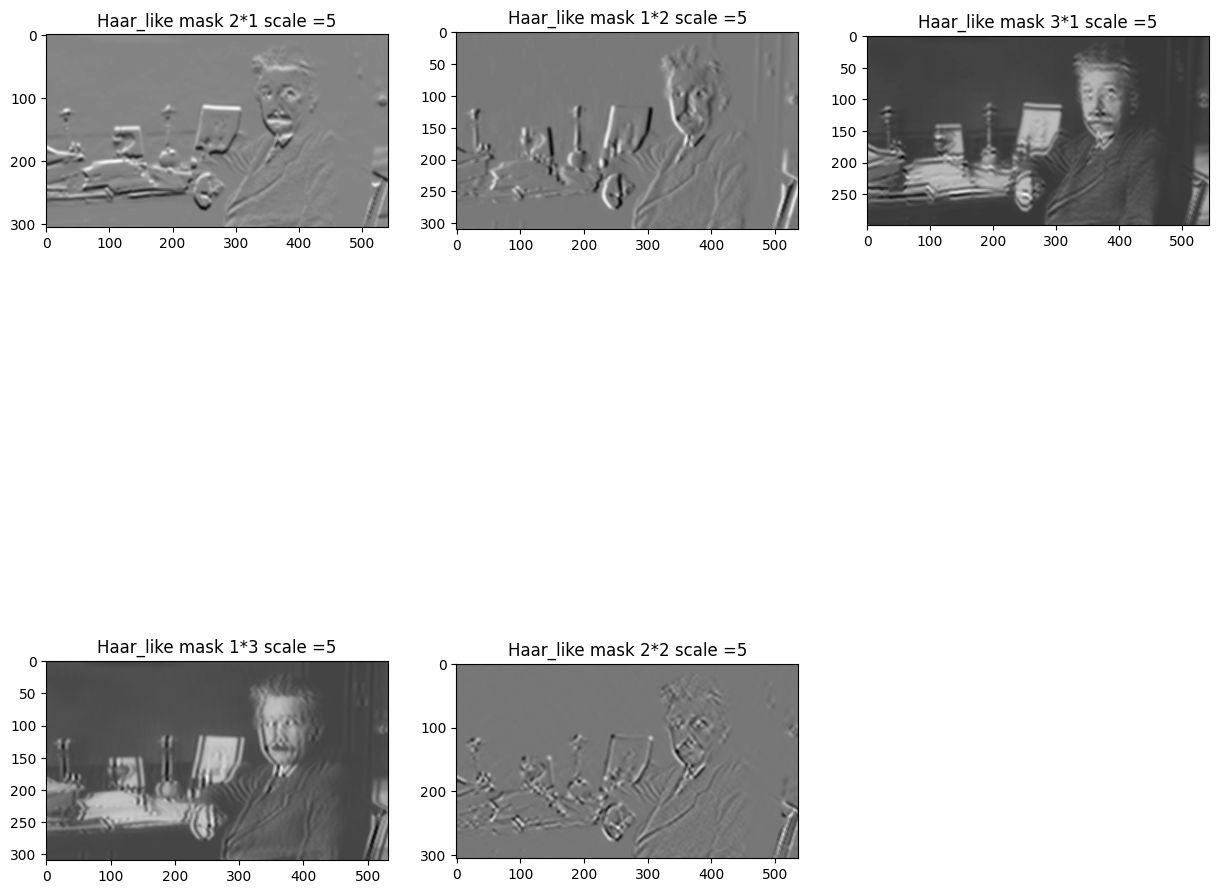

In [8]:
"""
scale factor=5
"""
res_1=harrlike_masks(image,21,5)
res_2=harrlike_masks(image,12,5)
res_3=harrlike_masks(image,31,5)
res_4=harrlike_masks(image,13,5)
res_5=harrlike_masks(image,22,5)
plt.figure(figsize=(15,15))
plt.subplot(231)
plt.title('Haar_like mask 2*1 scale =5')
plt.imshow(res_1,cmap='gray')
plt.subplot(232)
plt.title('Haar_like mask 1*2 scale =5')
plt.imshow(res_2,cmap='gray')
plt.subplot(233)
plt.title('Haar_like mask 3*1 scale =5')
plt.imshow(res_3,cmap='gray')
plt.subplot(234)
plt.title('Haar_like mask 1*3 scale =5')
plt.imshow(res_4,cmap='gray')
plt.subplot(235)
plt.title('Haar_like mask 2*2 scale =5')
plt.imshow(res_5,cmap='gray')


For higher scaling of mask. Conventional conv2d method is somehow time consuming, thus introducing image integral to save time

(301, 540)
(308, 533)
(294, 540)
(308, 526)
(301, 533)


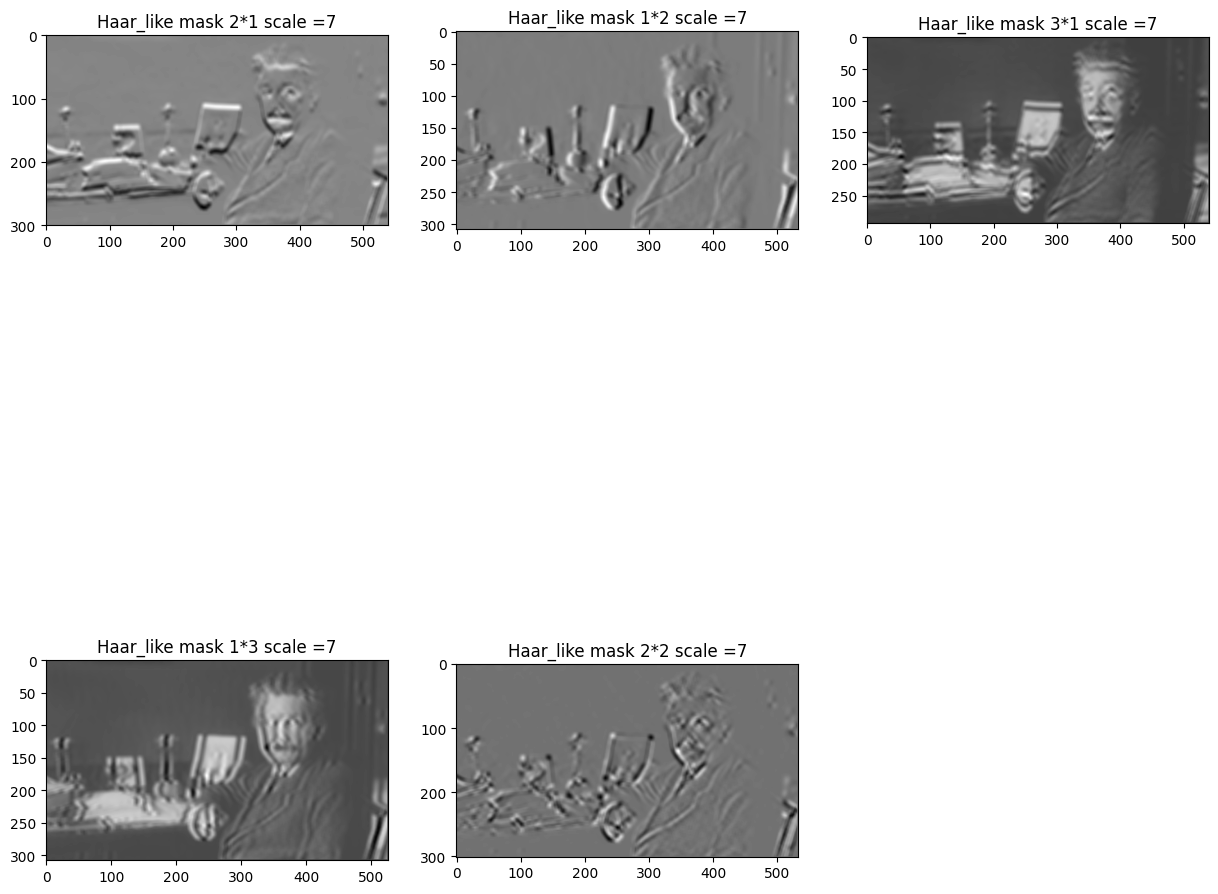

In [12]:
"""
utilizing image integration for faster conv2d computating in scale=7
"""
integral_image= np.zeros([image_x+1, image_y+1])
for i in range(1,image_x):
    for j in range(1,image_y):
        integral_image[i][j]= integral_image[i-1][j]+image[i-1][j-1]+integral_image[i][j-1]-integral_image[i-1][j-1]



def Haar_like_mask21 (s):
    mask_x, mask_y= 2*s, s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            res[i][j]= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j]-integral_image[i+s][j+mask_y]+integral_image[i+s][j]-\
                        (integral_image[i+s][j+mask_y]-integral_image[i+s][j]-integral_image[i][j+mask_y]+integral_image[i][j])

    print(res.shape)
    return res

def Haar_like_mask12 (s):
    mask_x, mask_y= s, 2*s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            res[i][j]= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j+s]-integral_image[i][j+mask_y]+integral_image[i][j+s]-\
                        (integral_image[i+mask_x][j+s]-integral_image[i+mask_x][j]-integral_image[i][j+s]+integral_image[i][j])
            
    print(res.shape)
    return res

def Haar_like_mask31 (s):
    mask_x, mask_y= 3*s, s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            res[i][j]= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j]-integral_image[i][j+mask_y]+integral_image[i][j]-\
                       2*(integral_image[i+2*s][j+s]-integral_image[i+2*s][j]-integral_image[i+s][j+s]+integral_image[i+s][j])
    print(res.shape)
    return res
def Haar_like_mask13 (s):
    mask_x, mask_y= s, 3*s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            res[i][j]= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j]-integral_image[i][j+mask_y]+integral_image[i][j]-\
                       2*(integral_image[i+mask_x][j+2*s]-integral_image[i+mask_x][j+s]-integral_image[i][j+2*s]+integral_image[i][j+s])
    print(res.shape)
    return res
def Haar_like_mask22 (s):
    mask_x, mask_y= 2*s, 2*s
    res = np.zeros((image_x - mask_x + 1, image_y - mask_y + 1))
    for i in range(image_x-mask_x):
        for j in range(image_y-mask_y):
            res[i][j]= integral_image[i+mask_x][j+mask_y]-integral_image[i+mask_x][j]-integral_image[i][j+mask_y]+integral_image[i][j]-\
                         2*(integral_image[i+mask_x][j+s]-integral_image[i+mask_x][j]-integral_image[i+s][j+s]+integral_image[i+s][j])-\
                         2*(integral_image[i+s][j+mask_y]-integral_image[i+s][j+s]-integral_image[i][j+mask_y]+integral_image[i][j+s])
    print(res.shape)
    return res


res_1=Haar_like_mask21(7)
res_2=Haar_like_mask12(7)
res_3=Haar_like_mask31(7)
res_4=Haar_like_mask13(7)
res_5=Haar_like_mask22(7)
plt.figure(figsize=(15,15))
plt.subplot(231)
plt.title('Haar_like mask 2*1 scale =7')
plt.imshow(res_1,cmap='gray')
plt.subplot(232)
plt.title('Haar_like mask 1*2 scale =7')
plt.imshow(res_2,cmap='gray')
plt.subplot(233)
plt.title('Haar_like mask 3*1 scale =7')
plt.imshow(res_3,cmap='gray')
plt.subplot(234)
plt.title('Haar_like mask 1*3 scale =7')
plt.imshow(res_4,cmap='gray')
plt.subplot(235)
plt.title('Haar_like mask 2*2 scale =7')
plt.imshow(res_5,cmap='gray')

Conclusions: 
1. For sobel kernels it detects the edge of the image, vertical and horizontal kernel detects the vertical edges and horizontal lines respectively.
2. Guassian kernels smooths and blur the image. As the kernel increased from 3 to 5, the effect become more distinct.
3. Haar-like masks of 2*1 and 1*2 size will detect the edge of the image. 2*1 detects the horizontal edges meanwhile 1*2 detects the vertical edges.
Haar-like masks of 3*1 and 1*3 size will detect the line of the image. 3*1 detects the horizontal lines of the image whereas 1*3 mask will detect and extract vertical lines.
Haar-like masks of 2*2 size will detect the four-rectangle features including the features representing corners.
4. As the scale of masks increases, masks can augment the coverage of images, as a result extract more prominent feature that are conducive for feature extraction.

Q2. Extract SIFT keypoints from im01.jpg

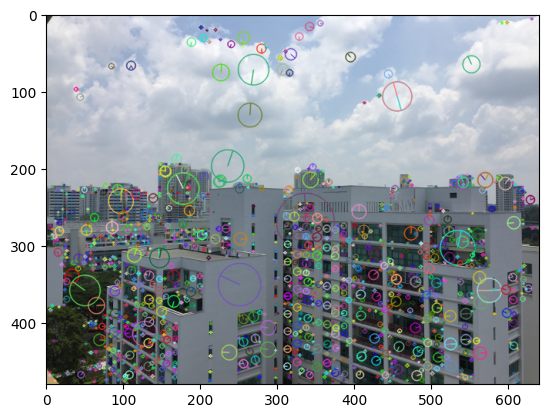

In [10]:
"""extract SIFT keypoints"""
image01 = cv2.cvtColor(cv2.imread('im01.jpg'), cv2.COLOR_BGR2RGB)

plt.imshow(image01)
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image01, None)

draw_key_points = cv2.drawKeypoints(image01, keypoints, image01, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
plt.imshow(draw_key_points)
